Retail sales Analysis

# Business Objective
The goal of this analysis is to explore retail transaction data to uncover:
- sales performance trends 
- Customer purchasing behavior
- product category performance 
- Revenue drivers

This project aims to generate business insights and actionable recommendatios.

# Data manipulation

In [2]:
import pandas as pd
import numpy as np 

# visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings 

In [4]:
pd.set_option('display.max_columns',None)

# Style

In [5]:
sns.set(style="whitegrid")

# load dataset

In [7]:
df = pd.read_csv(r"C:\Users\Ahmed\Desktop\retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# Understand the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# data cleaning
Convert Date to datetime

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

Extract new time features (Very important for analysis)

In [12]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month Name'] = df['Date'].dt.month_name()

In [13]:
# Preview data 
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May


In [ ]:
# Core analysis Questions

In [22]:
# Total Revenue
total_revenue = df['Total Amount'].sum()
total_revenue

np.int64(456000)

# Business insight
The company gererated 456000 total revenue during the analyzed period.

Revenue by Product Category

In [23]:
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
category_revenue

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

Visualization

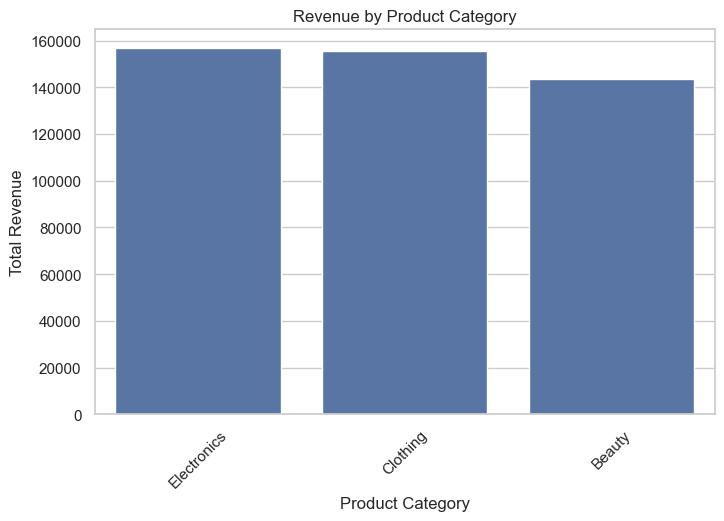

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Revenue by Product Category")
plt.ylabel ("Total Revenue")
plt.xticks(rotation=45)
plt.show()

Monthly sales trend

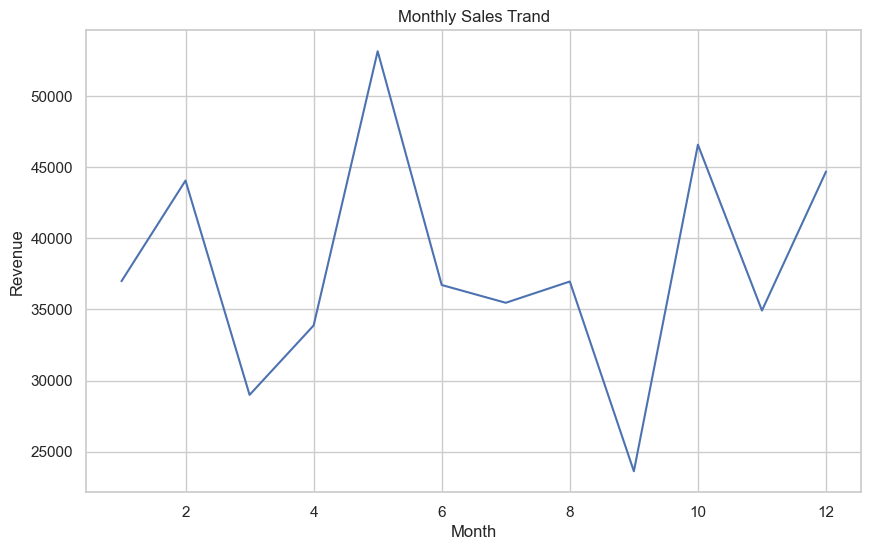

In [35]:
monthly_sales = df.groupby('Month')['Total Amount'].sum()
plt.figure(figsize=(10,6))
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Monthly Sales Trand")
plt.show()

# Gender Spending Analysis

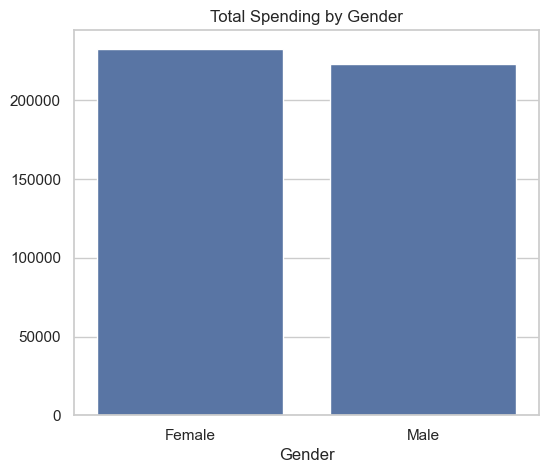

In [36]:
gender_spending = df.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(6,5))
sns.barplot(x=gender_spending.index, y=gender_spending.values)
plt.title('Total Spending by Gender')
plt.show()

Age Group Analysis

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_1344\283367250.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_revenue = df.groupby('Age_Group')['Total Amount'].sum()


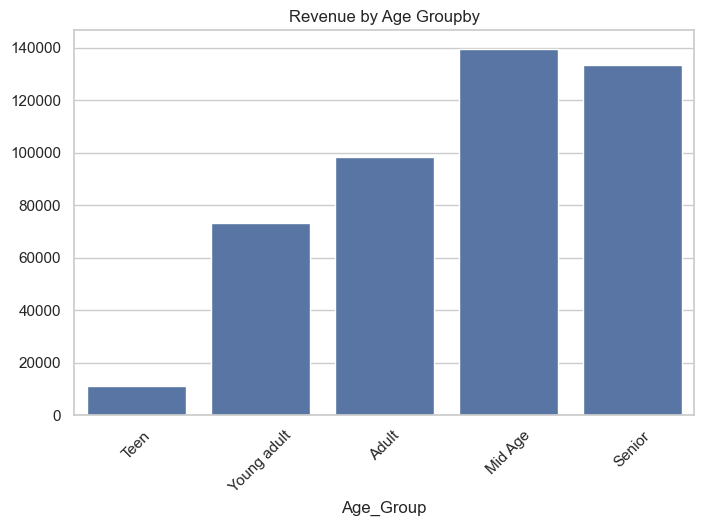

In [38]:
bins = [0,18,25,35,50,100]
labels = ['Teen','Young adult','Adult','Mid Age','Senior']

df["Age_Group"] = pd.cut(df['Age'], bins=bins, labels=labels)

age_revenue = df.groupby('Age_Group')['Total Amount'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=age_revenue.index, y=age_revenue.values)
plt.title('Revenue by Age Groupby')
plt.xticks(rotation=45)
plt.show()

# Key insights
1. Electronics generate the highest revenue.
2. Adults (25-35) contribute the most to sales.
3. Reenue peaks in certain months, indicating seasonal patterns.
4. Female customers slightly outspend male customers.

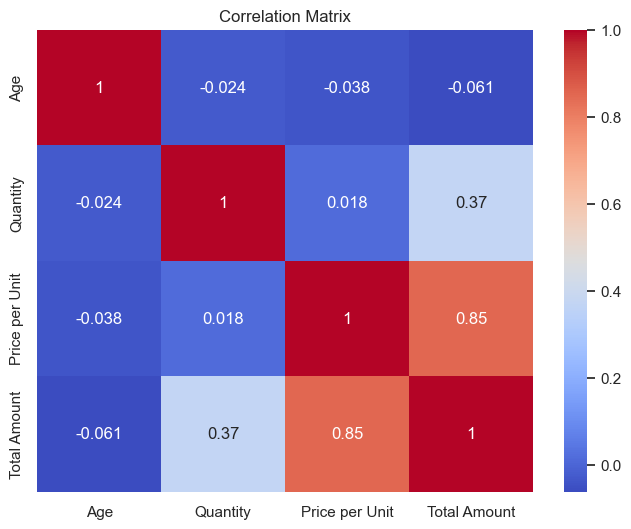

In [40]:
# Business Recommendations
- increase marketing campagns for top-performing categories.
- Target high-spending age groups with personalized offers.
- investigate low-performing months and apply promotional strategies.
-